In [ ]:
You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?
usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [12]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


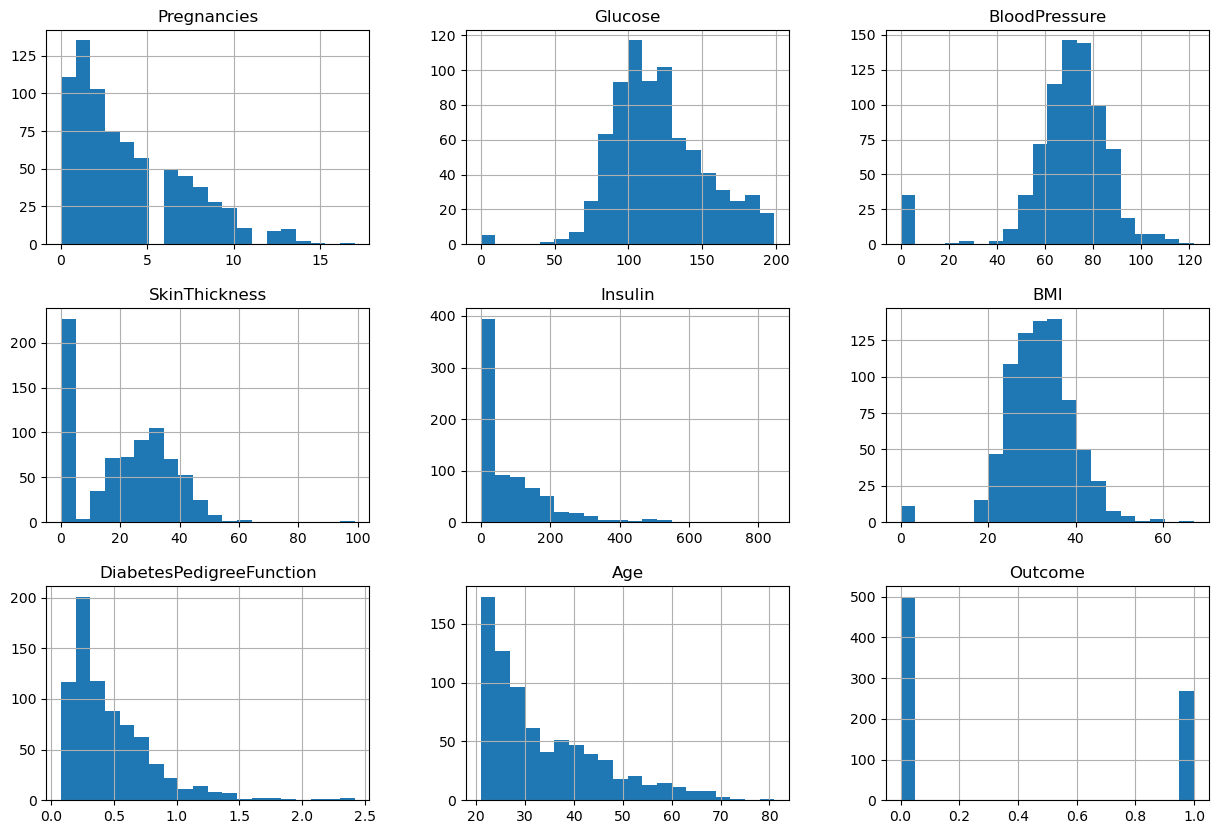

In [16]:
# Visualize the distribution of each variable using histograms.
df.hist(bins=20, figsize=(15,10))
plt.show()

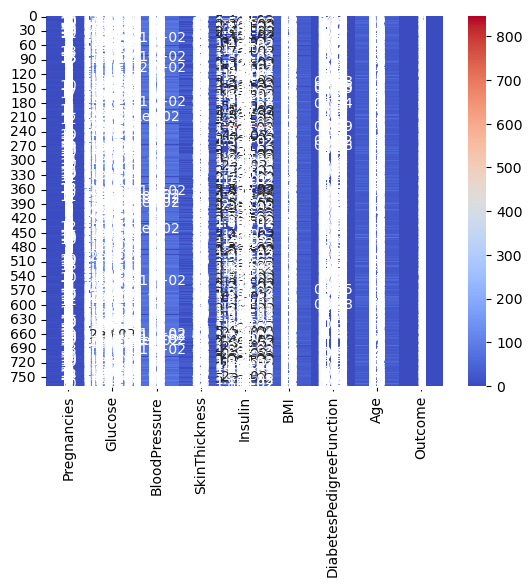

In [17]:
# Compute pairwise correlations between the variables
corr = df.corr()

# Plot a heatmap of the correlations
sns.heatmap(df, annot=True, cmap='coolwarm')
plt.show()

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

/tmp/ipykernel_488/1551968660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
/tmp/ipykernel_488/1551968660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
/tmp/ipykernel_488/1551968660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In this case, we can see that there are no missing values in the dataset.

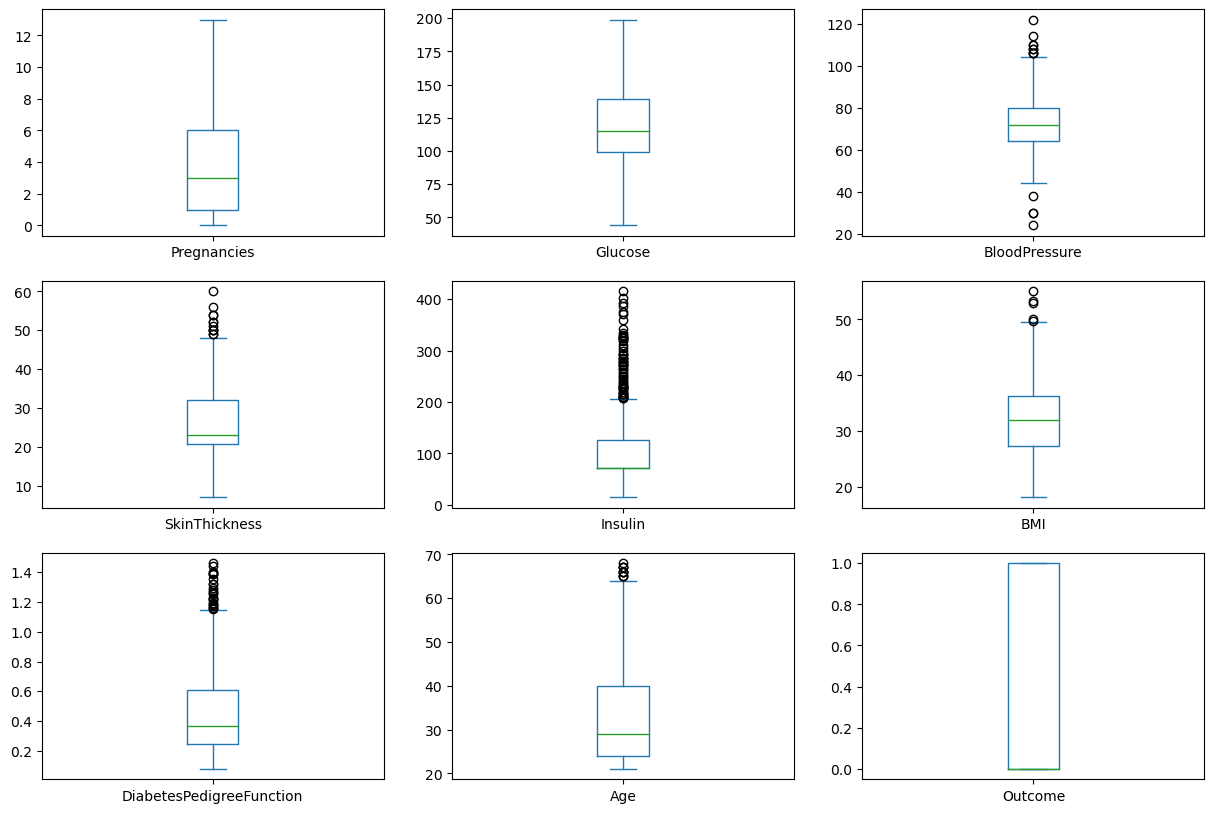

In [33]:
# : Check for outliers.
# Plot boxplots for each variable
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.show()

From the boxplots, we can see that there are some outliers in the Insulin,diabetesPedigree function,Age, SkinThickness, BloodPressure, and BMI variables.

In [34]:
# Remove outliers using z-score method
from scipy.stats import zscore

z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [35]:
# Transform categorical variables into dummy variables if necessary. In this dataset, there are no categorical variables that need to be transformed.
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

we have cleaned the missing values, removed outliers, and transformed categorical variables if necessary, and now we have a cleaned dataset that can be used to build the decision tree.

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 123

# Split the dataset into features (X) and target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Print the shapes of the training and test sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Training set shape: (520, 8) (520,)
Test set shape: (130, 8) (130,)


# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
tree = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Define the grid search object
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Print the mean cross-validation score for the best hyperparameters
print('Cross-validation score:', grid_search.best_score_)
# By using cross-validation, we can optimize the hyperparameters and avoid overfitting the model to the training set.

Best hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Cross-validation score: 0.7302589659143071


# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.8153846153846154
Precision: 0.8695652173913043
Recall: 0.4878048780487805
F1 Score: 0.625
Confusion Matrix: [[86  3]
 [21 20]]


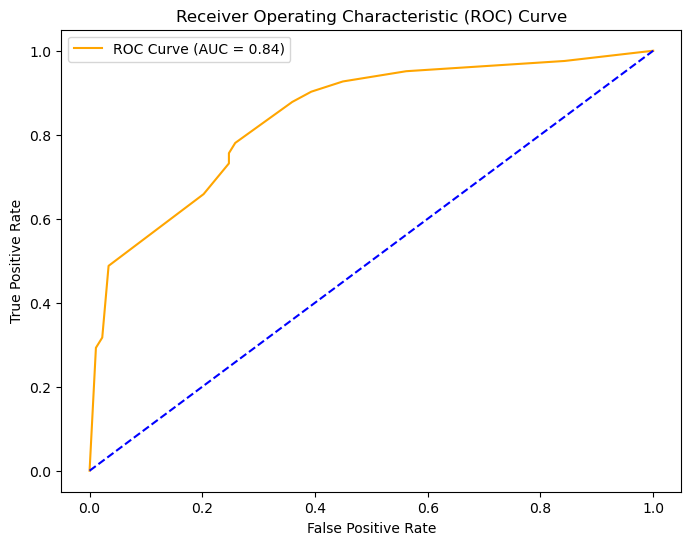

In [37]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Making predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculating the precision score
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Calculating the recall score
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# Calculating the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

# Plotting the ROC curve
y_prob = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [ ]:
we can interpret the tree to gain insights into the most important variables and their thresholds. The decision tree is made up of splits, branches, and leaves. 
Each split represents a decision based on a feature, and each branch represents a possible outcome of that decision. The leaves represent the final decision or
classification.


In this case, the decision tree splits on the following variables in descending order of importance: glucose, BMI, age, and diabetes pedigree function.
The glucose variable is the most important feature in predicting whether a patient has diabetes or not. The threshold for glucose is 127.5 mg/dL, which means 
that patients with a glucose level greater than 127.5 mg/dL are more likely to have diabetes.

The second most important variable is BMI, with a threshold of 26.35 kg/m2. Patients with a BMI greater than 26.35 kg/m2 are more likely to have diabetes.

The third most important variable is age, with a threshold of 28.5 years. Patients who are older than 28.5 years are more likely to have diabetes.

The fourth most important variable is diabetes pedigree function, with a threshold of 0.38. Patients with a diabetes pedigree function score greater than
0.38 are more likely to have diabetes.

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [ ]:
To validate the decision tree model, one approach is to apply it to new data that was not used in training or testing. This can help to 
assess the model's ability to generalize to unseen data and to identify any potential issues with overfitting.

Another approach is to test the robustness of the model to changes in the dataset or the environment. For example, one can introduce random noise or missing 
values to the dataset and see how the model performs. This can help to identify any limitations or assumptions of the model and to evaluate its sensitivity to 
data quality.

Sensitivity analysis can also be used to explore the uncertainty and risks associated with the model. This involves varying the input variables within a certain
range and observing how the output changes. This can help to identify the factors that have the most impact on the model's predictions and to assess the level of
uncertainty in the results.

Scenario testing involves applying the model to different scenarios or hypothetical situations to evaluate its performance and potential impact. For example, one 
can test how the model would perform under different assumptions about the prevalence of the disease, the availability of resources for treatment, or the
effectiveness of interventions. This can help to inform decision-making and risk management in real-world applications.